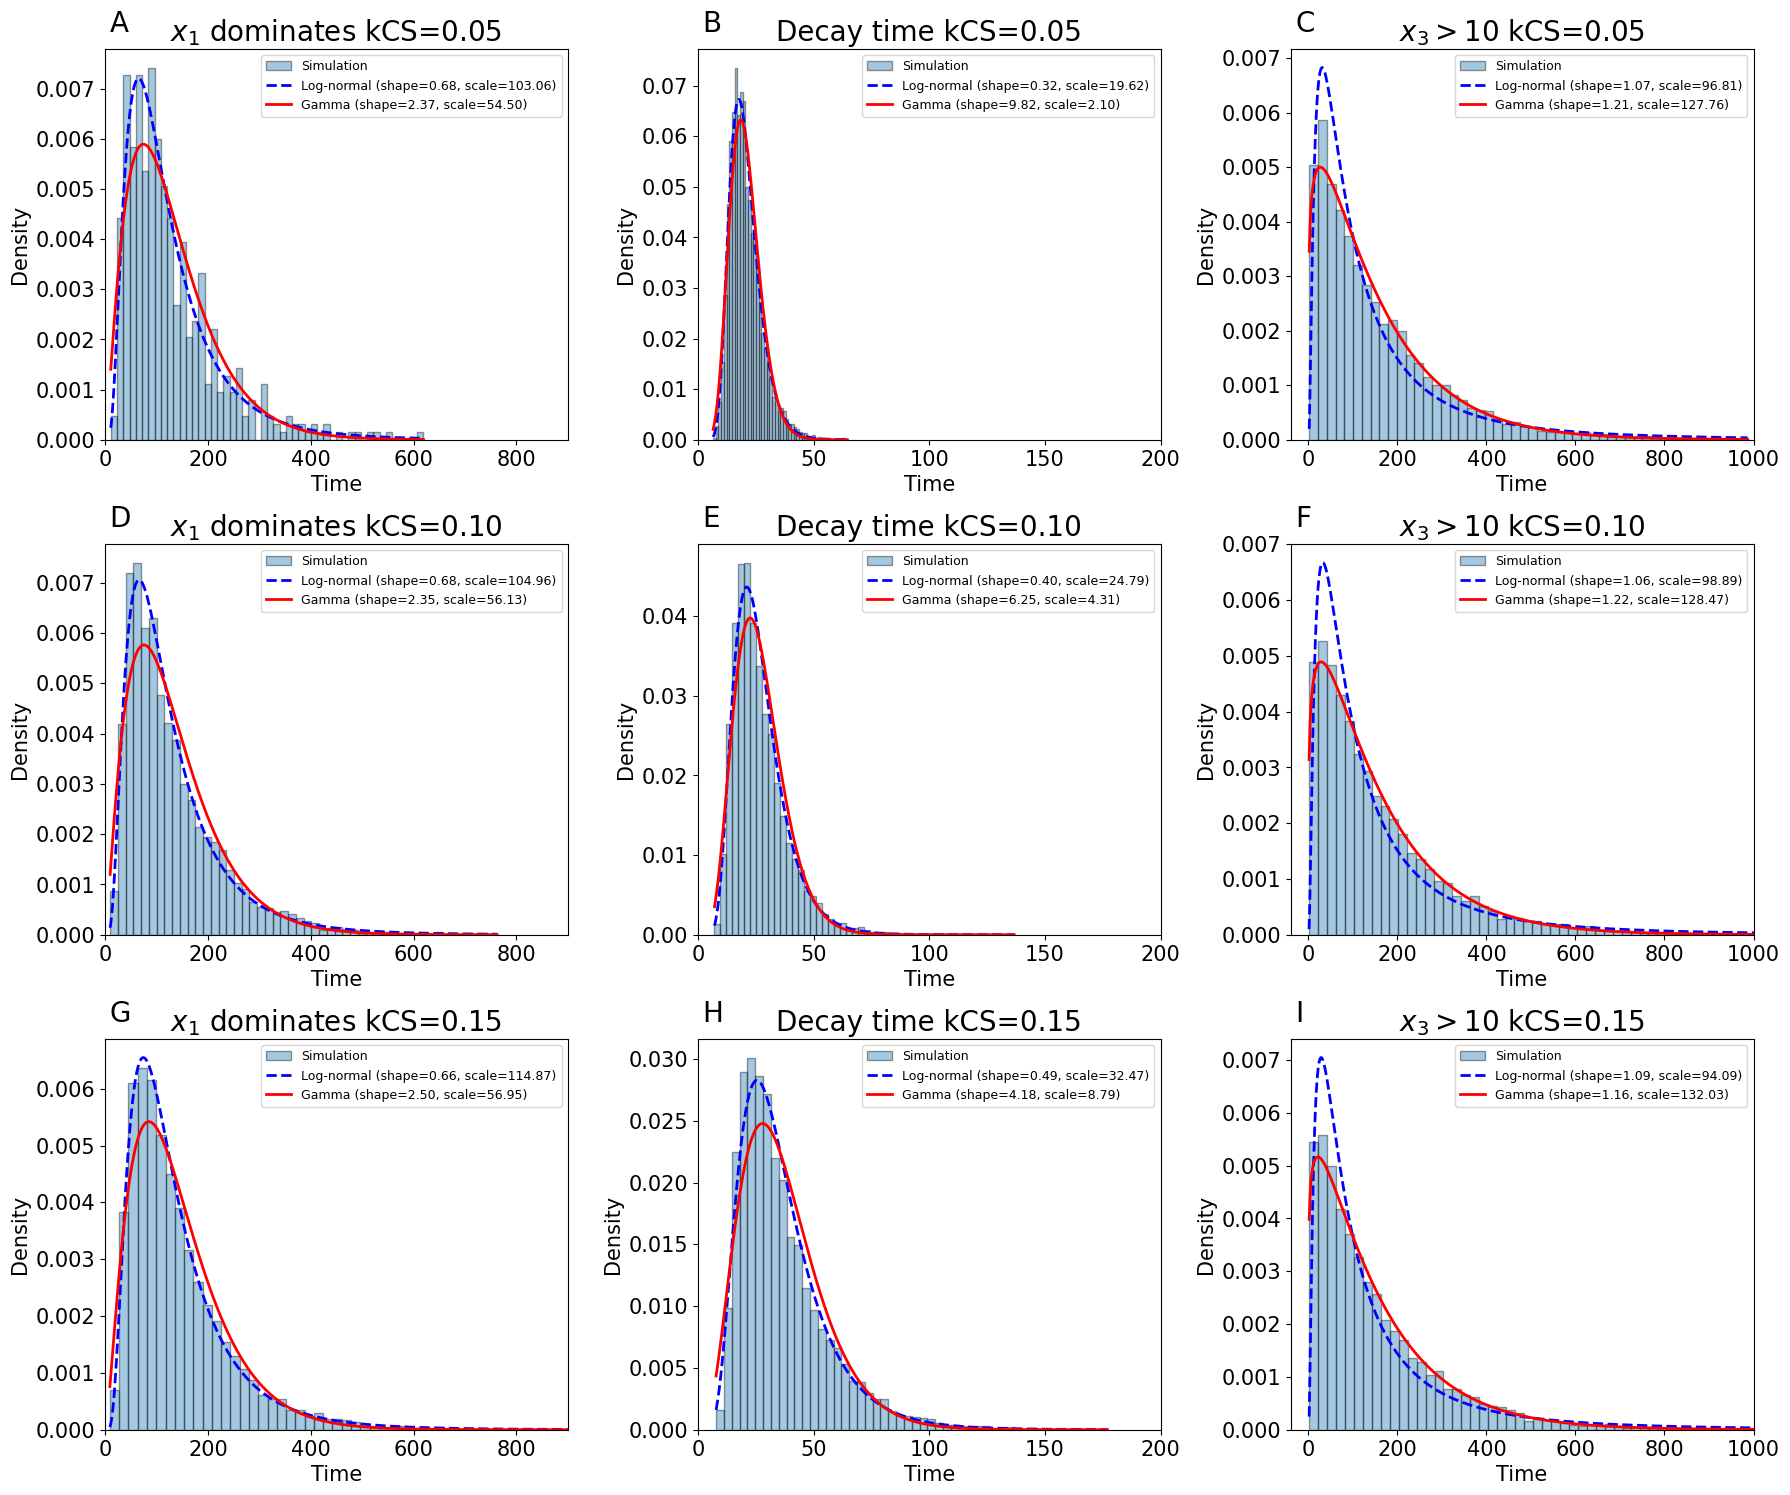

               Dataset       Dist     shape  loc       scale
0        x1_dom_kCS005  Lognormal  0.675152  0.0  103.060274
1        x1_dom_kCS005      Gamma  2.369735  0.0   54.495830
2    decay_time_kCS005  Lognormal  0.317865  0.0   19.615803
3    decay_time_kCS005      Gamma  9.819509  0.0    2.103803
4   x3_umbral10_kCS005  Lognormal  1.068444  0.0   96.809460
5   x3_umbral10_kCS005      Gamma  1.209203  0.0  127.763803
6        x1_dom_kCS010  Lognormal  0.678361  0.0  104.956341
7        x1_dom_kCS010      Gamma  2.348375  0.0   56.125533
8    decay_time_kCS010  Lognormal  0.398897  0.0   24.793774
9    decay_time_kCS010      Gamma  6.247605  0.0    4.308348
10           x3_kCS010  Lognormal  1.058341  0.0   98.891819
11           x3_kCS010      Gamma  1.221855  0.0  128.472560
12       x1_dom_kCS015  Lognormal  0.659249  0.0  114.865319
13       x1_dom_kCS015      Gamma  2.496833  0.0   56.949101
14   decay_time_kCS015  Lognormal  0.489849  0.0   32.474356
15   decay_time_kCS015  

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm, gamma

# Lista para guardar parámetros
resultados = []

def ajustar_y_graficar(ax, nombre_dataset, archivo, filtro=None, x_max=None,
                       titulo="", xlim=None):
    """Lee datos, ajusta lognormal y gamma (loc=0), guarda parámetros y grafica."""
    df = pd.read_csv(archivo)
    
    # Aplicar filtro si es necesario
    if filtro:
        for col, val in filtro.items():
            df = df[df[col] == val]
    
    # Recortar valores si se especifica un máximo
    if x_max:
        df = df[df['FinalTime'] < x_max]
    
    data = df['FinalTime'].values
    
    # Ajuste lognormal (loc=0)
    shape_logn, loc_l, scale_l = lognorm.fit(data, floc=0)
    
    # Ajuste gamma (loc=0)
    shape_gamma, loc_g, scale_g = gamma.fit(data, floc=0)
    
    # Guardar parámetros en lista
    resultados.append({
        "Dataset": nombre_dataset,
        "Dist": "Lognormal",
        "shape": shape_logn,
        "loc": loc_l,
        "scale": scale_l
    })
    resultados.append({
        "Dataset": nombre_dataset,
        "Dist": "Gamma",
        "shape": shape_gamma,
        "loc": loc_g,
        "scale": scale_g
    })
    
    # Rango para las PDFs
    x = np.linspace(min(data), max(data), 500)
    
    # PDFs
    pdf_lognorm = lognorm.pdf(x, shape_logn, loc_l, scale_l)
    pdf_gamma = gamma.pdf(x, shape_gamma, loc_g, scale_g)
    
    # Histograma
    ax.hist(data, bins=50, density=True, alpha=0.4,
            edgecolor='black', label='Simulation')
    ax.plot(x, pdf_lognorm, 'b--', lw=2,
            label=f'Log-normal (shape={shape_logn:.2f}, scale={scale_l:.2f})')
    ax.plot(x, pdf_gamma, 'r-', lw=2,
            label=f'Gamma (shape={shape_gamma:.2f}, scale={scale_g:.2f})')
    #ax.set_yscale('log')
    ax.set_xlabel('Time', fontsize=15)
    ax.set_ylabel('Density', fontsize=15)
    ax.set_title(titulo, fontsize=20)
    ax.legend(fontsize=9)
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    if xlim:
        ax.set_xlim(xlim)

# -------------------
# Figura y subplots
# -------------------
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()

ajustar_y_graficar(axes[0], "x1_dom_kCS005", "x1_dom.csv",
                   titulo=r"$x_1$ dominates kCS=0.05", xlim=(0, 900))
ajustar_y_graficar(axes[1], "decay_time_kCS005", "time_ext_x2.csv", x_max=1000,
                   titulo="Decay time kCS=0.05", xlim=(0, 200))
ajustar_y_graficar(axes[2], "x3_umbral10_kCS005", "x3_app_umbrales.csv",
                   filtro={"umbral": 10}, titulo=r"$x_3 > 10$ kCS=0.05", xlim=(-40, 1000))

ajustar_y_graficar(axes[3], "x1_dom_kCS010", "x1_dom_kCS01.csv",
                   titulo=r"$x_1$ dominates kCS=0.10", xlim=(0, 900))
ajustar_y_graficar(axes[4], "decay_time_kCS010", "time_ext_x2_kCS01.csv", x_max=1000,
                   titulo="Decay time kCS=0.10", xlim=(0, 200))
ajustar_y_graficar(axes[5], "x3_kCS010", "x3_app_kCS010.csv",
                   titulo=r"$x_3 > 10$ kCS=0.10", xlim=(-40, 1000))

ajustar_y_graficar(axes[6], "x1_dom_kCS015", "x1_dom_kCS015.csv",
                   titulo=r"$x_1$ dominates kCS=0.15", xlim=(0, 900))
ajustar_y_graficar(axes[7], "decay_time_kCS015", "time_ext_x2_kCS015.csv", x_max=1000,
                   titulo="Decay time kCS=0.15", xlim=(0, 200))
ajustar_y_graficar(axes[8], "x3_kCS015", "x3_app_kCS015.csv",
                   titulo=r"$x_3 > 10$ kCS=0.15", xlim=(-40, 1000))

# Letras A-I
letters = ['A','B','C','D','E','F','G','H','I']
for i, ax in enumerate(axes):
    ax.text(0.01, 1.1, letters[i], transform=ax.transAxes,
            fontsize=20, va='top')

plt.tight_layout()
plt.show()

# -------------------
# Guardar parámetros
# -------------------
df_parametros = pd.DataFrame(resultados)
#df_parametros.to_csv("parametros_ajustes.csv", index=False)
print(df_parametros)

In [38]:
def extraer_kcs(nombre):
    if "kCS005" in nombre:
        return 0.05
    elif "kCS010" in nombre:
        return 0.10
    elif "kCS015" in nombre:
        return 0.15
    else:
        return np.nan  # Por si hay algún caso que no encaje

# Crear columna kCS
df_parametros["kCS"] = df_parametros["Dataset"].apply(extraer_kcs)

def extraer_variable(nombre):
    if nombre.startswith("x1"):
        return "x1"
    elif nombre.startswith("decay"):
        return "decay"
    elif nombre.startswith("x3"):
        return "x3"
    else:
        return "otro"

# Crear nueva columna
df_parametros["Variable"] = df_parametros["Dataset"].apply(extraer_variable)

df_parametros.to_csv("parametros_ajustes_kCS.csv", index=False)
df_parametros

,Dataset,Dist,shape,loc,scale,kCS,Variable
0,x1_dom_kCS005,Lognormal,0.675152,0.0,103.060274,0.05,x1
1,x1_dom_kCS005,Gamma,2.369735,0.0,54.495830,0.05,x1
2,decay_time_kCS005,Lognormal,0.317865,0.0,19.615803,0.05,decay
3,decay_time_kCS005,Gamma,9.819509,0.0,2.103803,0.05,decay
4,x3_umbral10_kCS005,Lognormal,1.068444,0.0,96.809460,0.05,x3
5,x3_umbral10_kCS005,Gamma,1.209203,0.0,127.763803,0.05,x3
6,x1_dom_kCS010,Lognormal,0.678361,0.0,104.956341,0.10,x1
7,x1_dom_kCS010,Gamma,2.348375,0.0,56.125533,0.10,x1
8,decay_time_kCS010,Lognormal,0.398897,0.0,24.793774,0.10,decay
9,decay_time_kCS010,Gamma,6.247605,0.0,4.308348,0.10,decay
